- *Sinh viên làm trực tiếp vào file này, thêm code vào những chỗ TODO*
- *Ouput đúng được đính kèm.*
- Trong bài này các plot có thể khác style một chút, nhưng nội dung hiển thị phải giống.
- Chỉ dùng `matplotlib`, không dùng thêm thư viện vẽ hình khác.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Đọc Dataframe từ file csv, với các cột như sau
field_names = ['Region', 'Country', 'HIV Treatment Rate', 
               'GNI per capita (USD)', 'GDP growth (annual %)',
               'Adult literacy rate','GDP per capita growth']
world_df = pd.read_csv('Data/world_data.csv',skiprows=1,names=field_names)
world_df

,Region,Country,HIV Treatment Rate,GNI per capita (USD),GDP growth (annual %),Adult literacy rate,GDP per capita growth
0,Latin America & Caribbean,Aruba,NaN,24840.0,-18.589099,97.989998,-18.698324
1,South Asia,Afghanistan,10.75,500.0,-2.351101,37.266041,-5.364666
2,Sub-Saharan Africa,Angola,33.50,1690.0,-5.638215,69.215057,-8.672432
3,Europe & Central Asia,Albania,48.00,5270.0,-3.302082,98.500000,-2.745239
4,Europe & Central Asia,Andorra,NaN,NaN,-11.183940,NaN,-12.735078
...,...,...,...,...,...,...,...
213,Middle East & North Africa,"Yemen, Rep.",29.25,NaN,NaN,NaN,NaN
214,Sub-Saharan Africa,South Africa,72.75,6090.0,-6.342471,92.115764,-7.481093
215,Sub-Saharan Africa,Zambia,84.50,1130.0,-2.785055,87.500000,-5.595733
216,Sub-Saharan Africa,Zimbabwe,87.75,1460.0,-7.816951,89.271709,-9.670405


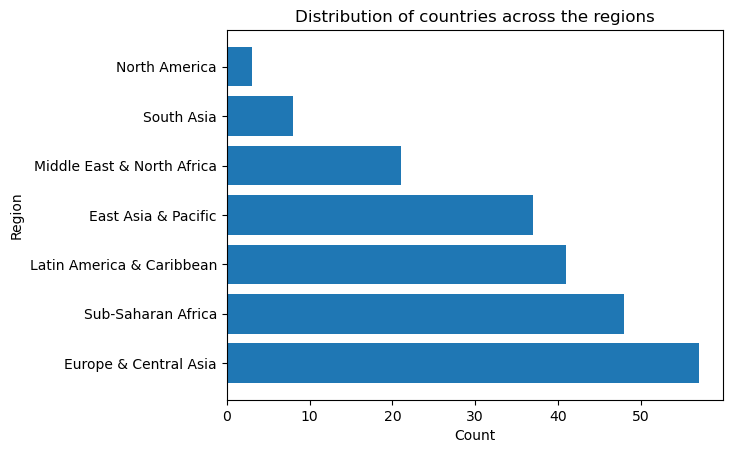

In [3]:
# Vẽ barplot cho các Region

# TODO

region = world_df['Region'].value_counts()
x = region.index
y = region.values
plt.barh(x, y)
plt.title("Distribution of countries across the regions")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

(0.0, 60000.0)

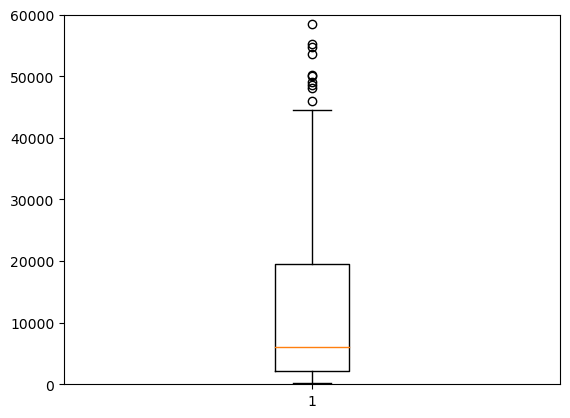

In [4]:
# Vẽ boxplot cho 'GNI per capita (USD)'

# TODO
GNI_per_cap = world_df['GNI per capita (USD)'].values
GNI_per_cap = GNI_per_cap[~np.isnan(GNI_per_cap)]

plt.boxplot(GNI_per_cap)
plt.ylim([0.0, 60000.0])

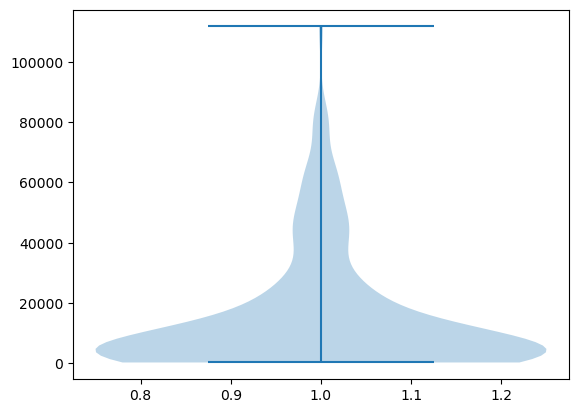

In [5]:
# Vẽ violinplot cho 'GNI per capita (USD)'

# TODO
plt.violinplot(GNI_per_cap)
plt.show()

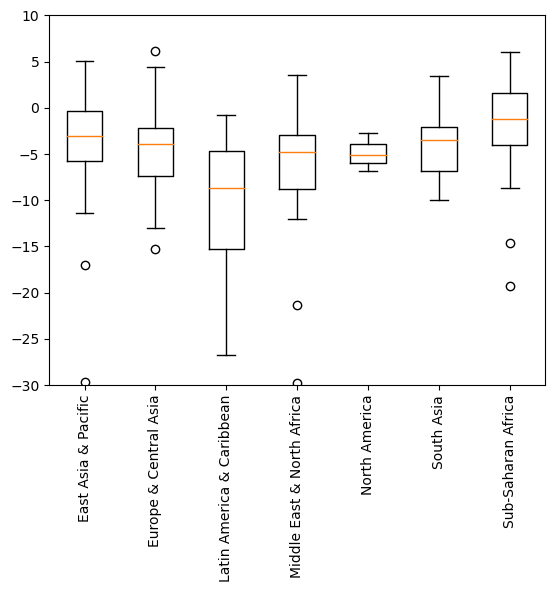

In [6]:
# Vẽ boxplot của 'GDP growth (annual %)' thuộc các Region lên cùng một biểu đồ

# TODO

temp_df = world_df[world_df['GDP growth (annual %)'].notna()]

grouped_data = dict(tuple(temp_df.groupby('Region')['GDP growth (annual %)']))
plt.boxplot(grouped_data.values(), labels=grouped_data.keys())
plt.xticks(rotation=90)
plt.ylim([-30, 10])
plt.show()

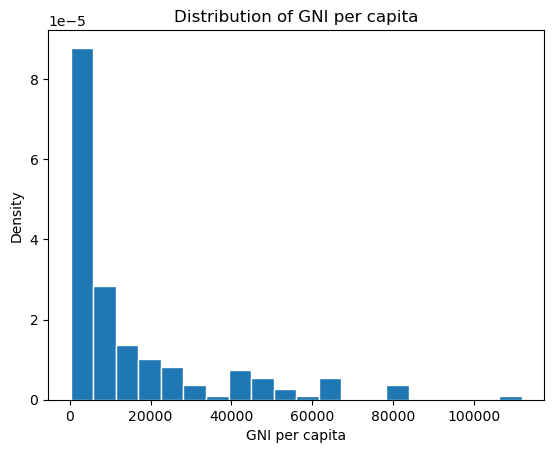

In [7]:
# Vẽ histogram của 'GNI per capita (USD)'

# TODO

plt.hist(x=world_df['GNI per capita (USD)'], bins=20, density=True, edgecolor='White')
plt.title('Distribution of GNI per capita')
plt.ylabel('Density')
plt.xlabel('GNI per capita')
plt.show()

Gọi các vùng sau là bán cầu bắc (Northern)
- 'Europe & Central Asia'
- 'North America'
- 'East Asia & Pacific'
  
Gọi các vùng sau là bán cầu nam (Southern)
- 'Sub-Saharan Africa'
- 'Middle East & North Africa'
- 'South Asia'
- 'Latin America & Caribbean'

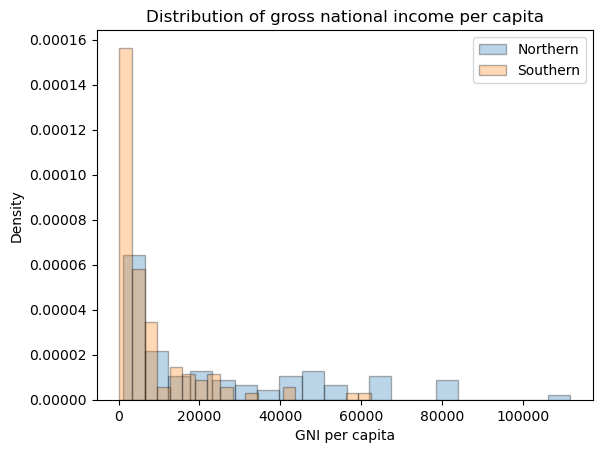

In [8]:
# Hãy vẽ 2 histogram thể hiện sự phân bố của cột 'GNI per capita (USD)'
# cho bán cầu bắc và bán cầu nam lên cùng một bản đồ
 
# TODO

northern = ['Europe & Central Asia', 'North America', 'East Asia & Pacific']
southern = ['Sub-Saharan Africa','Middle East & North Africa','South Asia','Latin America & Caribbean']

northern_data = world_df.loc[world_df['Region'].isin(northern), 'GNI per capita (USD)']
southern_data = world_df.loc[world_df['Region'].isin(southern), 'GNI per capita (USD)']

kwargs = dict(bins=20, edgecolor='black', density=True, alpha = 0.3)
plt.hist(northern_data, **kwargs, label='Northern')
plt.hist(southern_data, **kwargs, label='Southern')
plt.title('Distribution of gross national income per capita')
plt.ylabel('Density')
plt.xlabel('GNI per capita')
plt.legend()
plt.show()

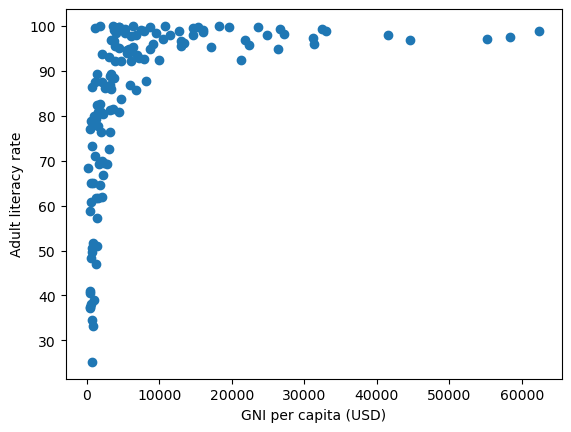

In [9]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'

# TODO

plt.scatter(data=world_df, x='GNI per capita (USD)', y='Adult literacy rate')
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Adult literacy rate')
plt.show()

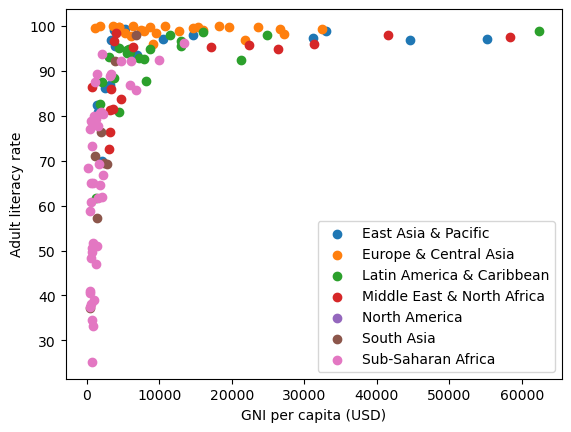

In [10]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# cho mỗi Region với màu khác nhau
# TODO

grouped_data = dict(tuple(world_df.groupby('Region')[['GNI per capita (USD)', 'Adult literacy rate']]))

for region in grouped_data.keys():
    plt.scatter(data=grouped_data[region], x='GNI per capita (USD)', y='Adult literacy rate', label=region)

plt.legend()
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Adult literacy rate')
plt.show()

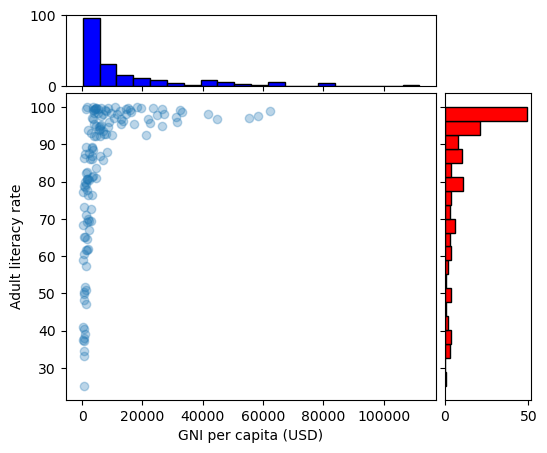

In [11]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# Cùng với hai histogram ở hai trục

# TODO

fig = plt.figure(figsize=(6,5))

grid = plt.GridSpec(5, 5, hspace=0.1, wspace=0.1)
main_ax = fig.add_subplot(grid[1:, :-1])

x_hist = fig.add_subplot(grid[0, :-1] , sharex=main_ax)
y_hist = fig.add_subplot(grid[1:, -1], sharey=main_ax)
x_hist.tick_params(axis='x', labelbottom=False)
y_hist.tick_params(axis='y', labelleft=False)
main_ax.scatter(data=world_df, x='GNI per capita (USD)', y='Adult literacy rate', alpha=0.3)
main_ax.set_xlabel('GNI per capita (USD)')
main_ax.set_ylabel('Adult literacy rate')
x_hist.hist(world_df['GNI per capita (USD)'], bins=20,orientation='vertical', color='blue', edgecolor='Black')
y_hist.hist(world_df['Adult literacy rate'], bins=20, orientation='horizontal', color='red', edgecolor='Black')
plt.show()